In [265]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [324]:
# Read the input file
data = pd.read_csv('loan.csv', low_memory=False)

# Print first 5 rows to look at the data
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [325]:
# Check information about the data
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [326]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [327]:
# Removing Unique values since they do not generate any insights/trends for us
data = data.drop('id',axis =1)
data = data.drop('member_id', axis = 1)

In [328]:
# Drop duplicates as they add bias
data = data.drop_duplicates()

In [329]:
# Drop all columns filled with NA values
data.dropna(how='all', axis=1, inplace=True)

In [330]:
# Check the information of the resulting dataframe
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [331]:
# Removing the following columns as they are filled with a single value and do not add any relevant information
data = data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1)

In [332]:
#Check the shape of the resulting df
data.shape

(39717, 46)

In [333]:
# Checking loan_status column
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [334]:
# Removing all rows where loan_status is current as they cannot yet be classified as defaulter or non-defaulter
data = data[data.loan_status != 'Current']

In [335]:
data.shape

(38577, 46)

In [336]:
# List all remaining columns
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths'],
      dtype='object')

In [337]:
# Removing all irrelevant columns
data = data.drop(["url", "title", "emp_title", "zip_code", "last_credit_pull_d", "desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"],axis=1)

In [338]:
data.shape

(38577, 22)

In [339]:
# Checking the remaining columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

In [340]:
#emp_length has missing values
data.emp_length.value_counts()


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [342]:
# Filling in missing values in emp_length
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)
# using mode because very few values are missing

In [343]:
# Converting emp_length to standar values
data.emp_length = data.emp_length.astype(str)
data.emp_length = data.emp_length.map(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))
data.emp_length.value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

## Treating the data

<Axes: xlabel='annual_inc'>

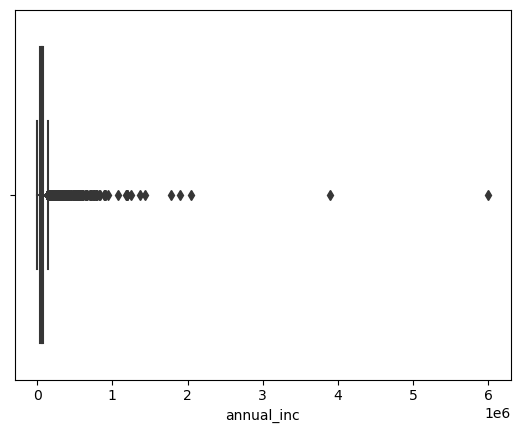

In [344]:
sns.boxplot(x = data['annual_inc'],width = 0.8)

In [345]:
# Outlierrs detected
quant_info = data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [346]:
# removing values above 0.95 quantile to treat outliers
annual_inc_95 = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= annual_inc_95]

<Axes: xlabel='annual_inc'>

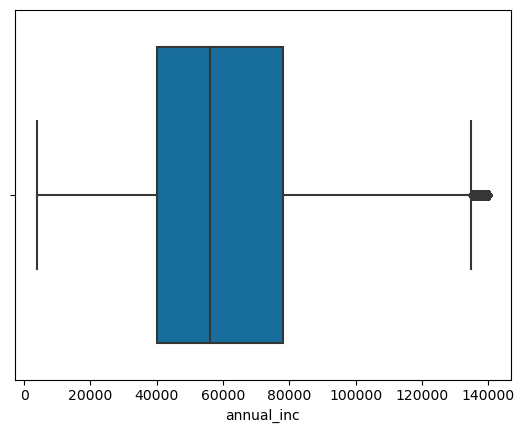

In [347]:
sns.boxplot(x = data['annual_inc'],width = 0.8)

<Axes: xlabel='dti'>

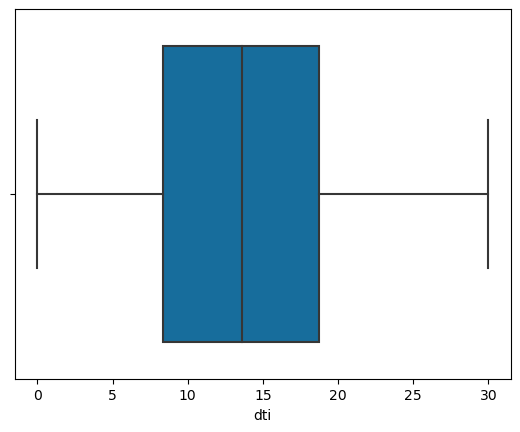

In [348]:
# Checking 'dti' for outliers
sns.boxplot(x = data.dti, width = 0.8)

<Axes: xlabel='loan_amnt'>

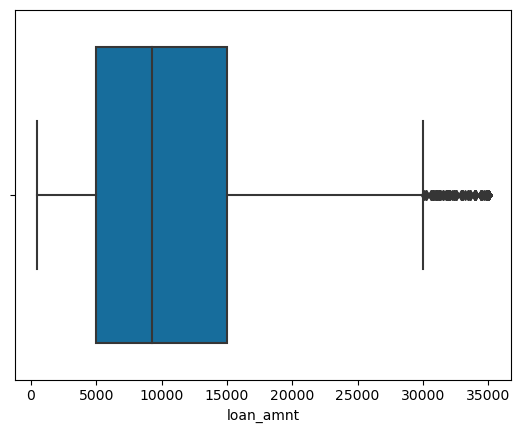

In [349]:
# Checking 'loan_amnt' for outliers
sns.boxplot(x = data.loan_amnt, width = 0.8)

<Axes: xlabel='funded_amnt_inv'>

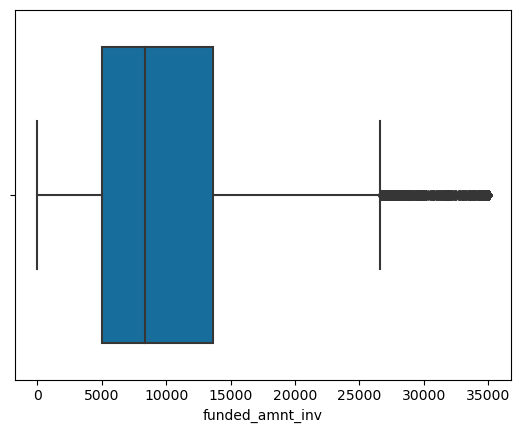

In [350]:
# Checking 'funded_amnt_inv' for outliers
sns.boxplot(x = data.funded_amnt_inv, width = 0.8)

## Visualizing and analyzing data

<Axes: xlabel='loan_status', ylabel='count'>

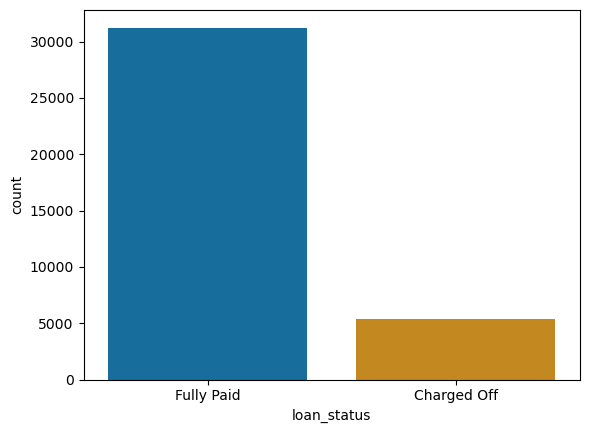

In [351]:
sns.countplot(x = 'loan_status', data = data)

A very small subset of data has the status as 'Charged Off'

In [352]:
data.sub_grade = pd.to_numeric(data.sub_grade.apply(lambda x : x[-1]))
data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

In [353]:
# Creating another dataframe with only defaulter data
dfltr_data = data[data['loan_status'] == 'Charged Off']

**Visualizing Grade**

<Axes: xlabel='grade', ylabel='count'>

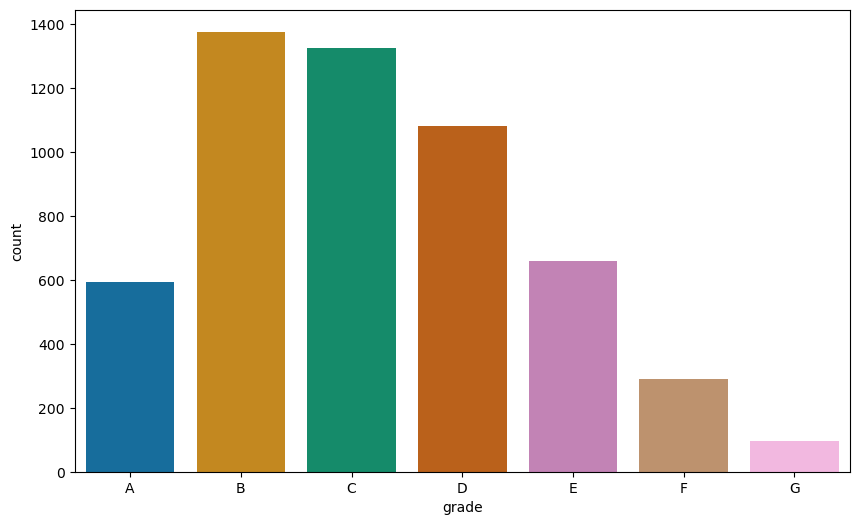

In [354]:
fig = plt.subplots(figsize=(10,6))
sns.countplot(x = 'grade', data = dfltr_data, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

**Outcome** : We see that grades B,C and D have the highest number of defaulters

**Visualizing Home Ownership**

In [355]:
# Checking values
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [356]:
data['home_ownership'].value_counts()

RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

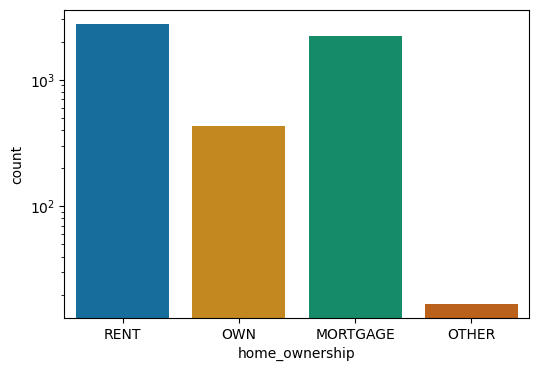

In [357]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=dfltr_data)

**Outcome**: Most defualters either live on a rented property or a mortgaged property

**Visualizing Purpose**

<Axes: xlabel='count', ylabel='purpose'>

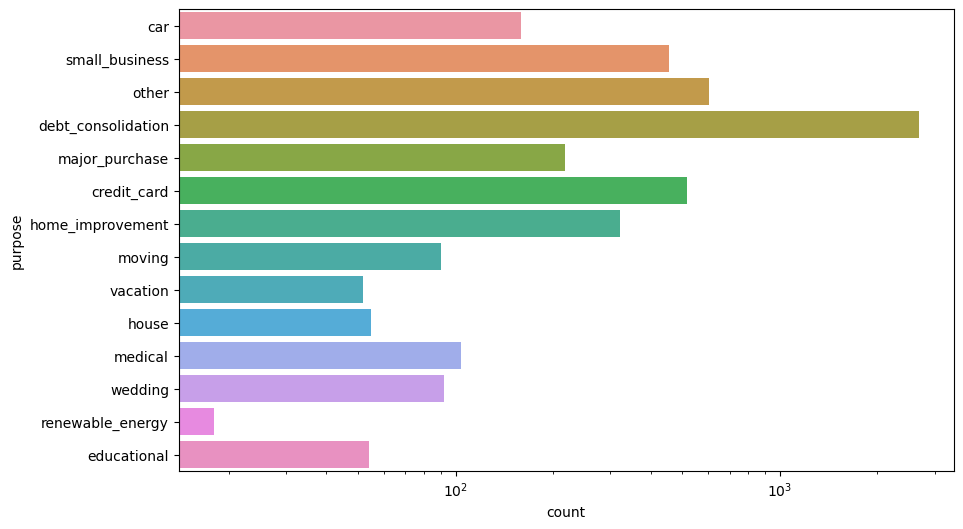

In [358]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=dfltr_data)

**Outcome:** Most defaulters take loan for debt consolidation purposes

**Visualizing 'funded_amnt_inv'**

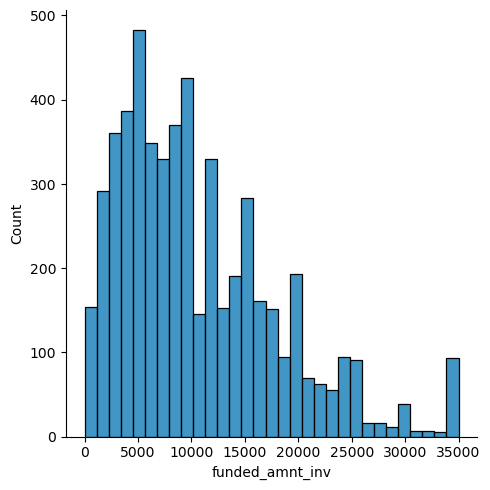

In [359]:
sns.displot(dfltr_data['funded_amnt_inv'])
plt.show()

**Outcome:** Most defaulters received a loan between 2000 - 11000

**Visualizing 'loan_amnt'**

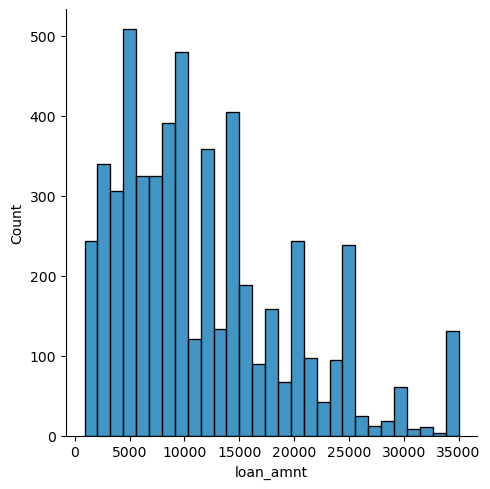

In [360]:
sns.displot(dfltr_data['loan_amnt'])
plt.show()

**Outcome:** Most defaulters applied for a loan between 2000 - 15000

**Visualizing 'term'**

<Axes: xlabel='count', ylabel='term'>

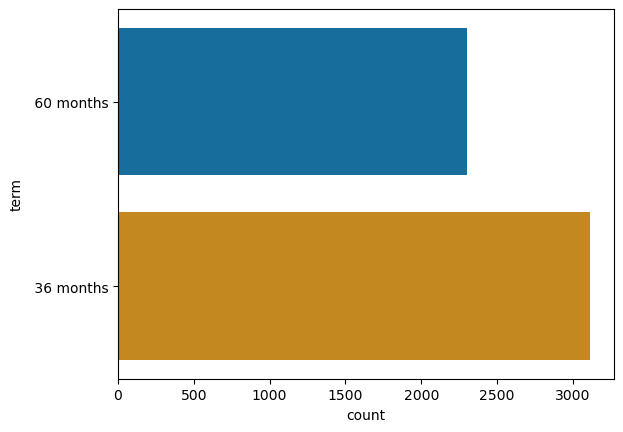

In [361]:
sns.countplot(y='term', data=dfltr_data)

**Outcome:** Loan term does not have a major effect on defaulting.

**visualizing 'verification_status'**

<Axes: xlabel='verification_status', ylabel='count'>

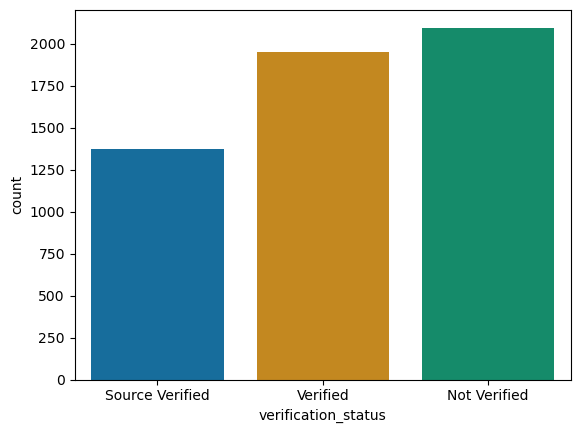

In [362]:
sns.countplot(x='verification_status', data=dfltr_data)

**Outcome:** Verification status does not have a major effect on defaulting

**Visualizing 'addr_state'**

<Axes: xlabel='addr_state', ylabel='count'>

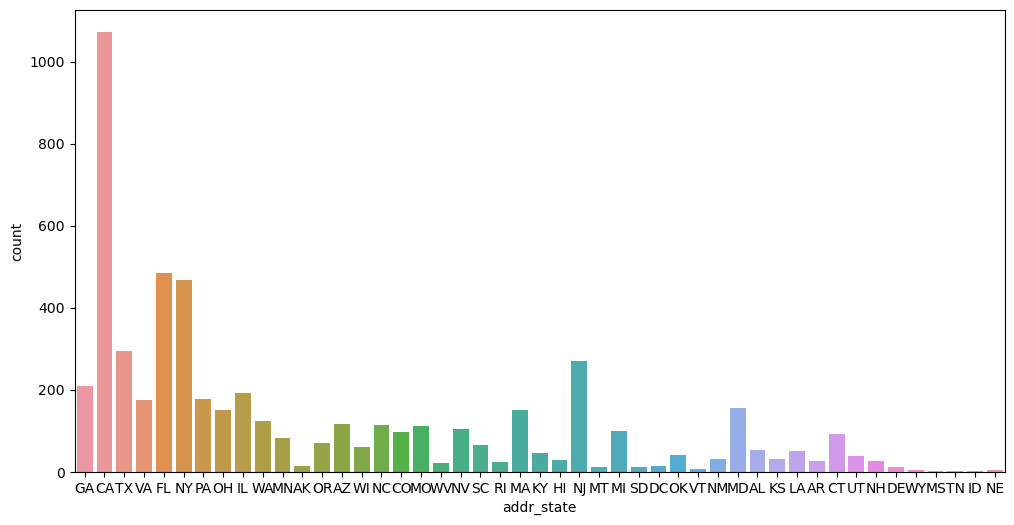

In [382]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='addr_state', data=dfltr_data)

**Outcome:** Applicants from state 'CA' have the highest probability of defaulting

**Visualizing 'inq_last_6mths'**

<Axes: xlabel='inq_last_6mths', ylabel='count'>

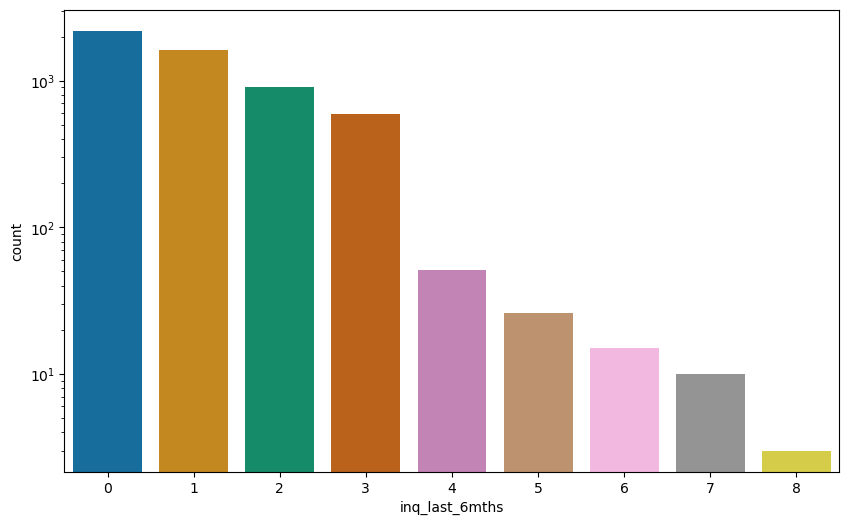

In [383]:
fig,ax = plt.subplots(figsize = (10,6))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=dfltr_data)

**Outcome:** Probability of defaulting decreases with more number of inquiries

**Visualizing 'pub_rec'**

<Axes: xlabel='pub_rec', ylabel='count'>

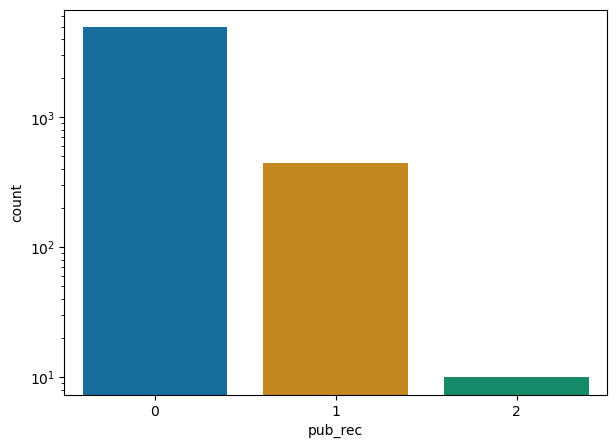

In [370]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=dfltr_data)

**Outcome:** Most defaulters had no prior public records

**Visualizing 'issue_d'**

In [371]:
df_month_year = data['issue_d'].str.partition("-", True)     
data['issue_month']=df_month_year[0]                       
data['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

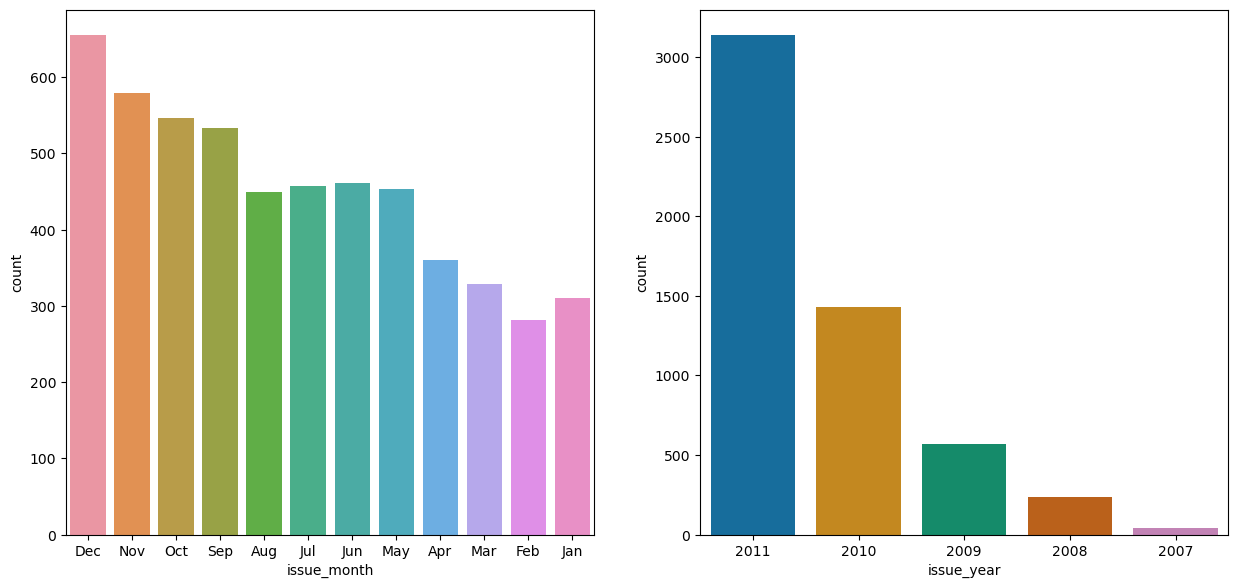

In [374]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=data[data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=data[data['loan_status']=='Charged Off'])

**Outcome:** People are more likely to default during year end. Most number of defaulters were seen in 2011.

### Bivariate Analysis

**Loan amount vs Income**

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

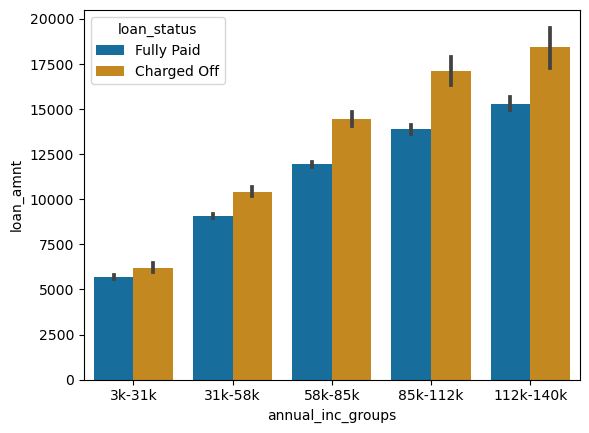

In [377]:
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = data)

**Outcome:** People with higher loan amounts are more likely to default in all income groups

**Loan amount vs Loan Purpose**

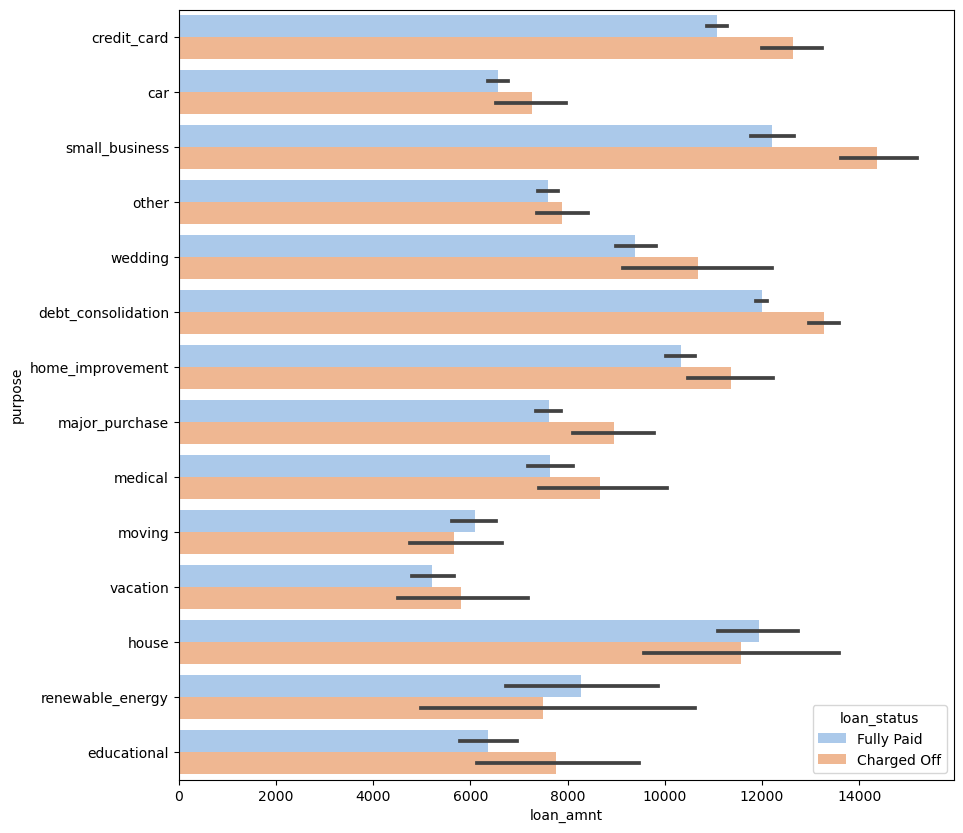

In [378]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

**Outcome:** Most defaulters took the loan for 'small business','credit card', 'debt consolidation', 'home improvement' or 'wedding'